# 🔍 Notebook ML Interactif Amélioré
Ce notebook permet d'entraîner automatiquement un modèle de machine learning en détectant le type de tâche (classification ou régression), avec visualisations, évaluation croisée, et sélection de modèle.

In [1]:
# 📁 Upload du fichier CSV
from google.colab import files
import pandas as pd

uploaded = files.upload()
for fn in uploaded:
    df = pd.read_csv(fn)

print("Aperçu des données :")
df.head()

Saving exemple_classification.csv to exemple_classification.csv
Aperçu des données :


,feature_1,feature_2,feature_3,feature_4,feature_5,label
0,-1.773053,-0.129414,0.186609,0.607897,-0.317578,0
1,-1.347700,-1.391369,-0.374821,-0.240325,1.674886,0
2,-2.002575,-0.223762,0.223788,-0.517611,-0.809471,0
3,-0.895796,0.981310,0.746254,-1.359856,1.293444,0
4,0.362209,0.954005,-0.247519,-0.727137,1.318564,1


In [2]:
# ⚙️ Imports et fonctions améliorées
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, mean_squared_error,
                             roc_curve, auc, RocCurveDisplay)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 🔄 Prétraitement et détection automatique
def detect_task(y):
    if y.dtype == 'object' or len(np.unique(y)) <= 10:
        return 'classification'
    else:
        return 'regression'

def preprocess(df, target):
    df = df.dropna()
    X = df.drop(columns=[target])
    y = df[target]

    if y.dtype == 'object':
        y = pd.factorize(y)[0]

    X = pd.get_dummies(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42), detect_task(y)

In [4]:
# 📊 Fonctions d'évaluation et d'affichage
def plot_confusion(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Matrice de confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Réel")
    plt.show()

def plot_feature_importance(model, X):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        plt.barh(range(len(importances)), importances)
        plt.title("Importance des variables")
        plt.show()

def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.title("Courbe ROC")
    plt.legend()
    plt.show()

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.94      0.88      0.91        17

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



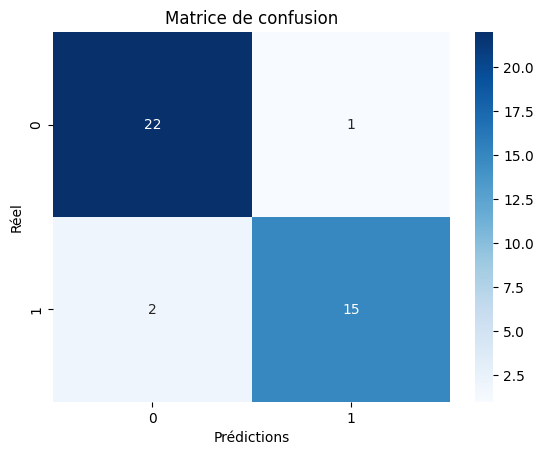

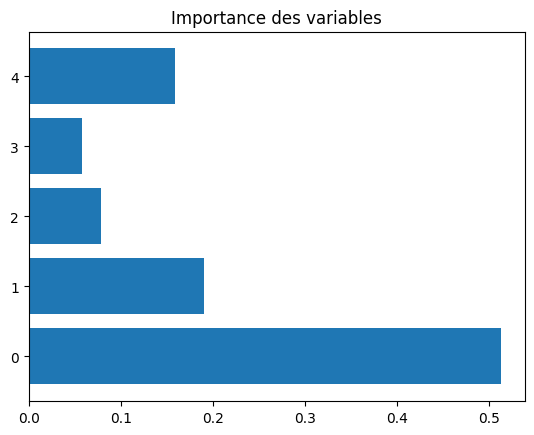

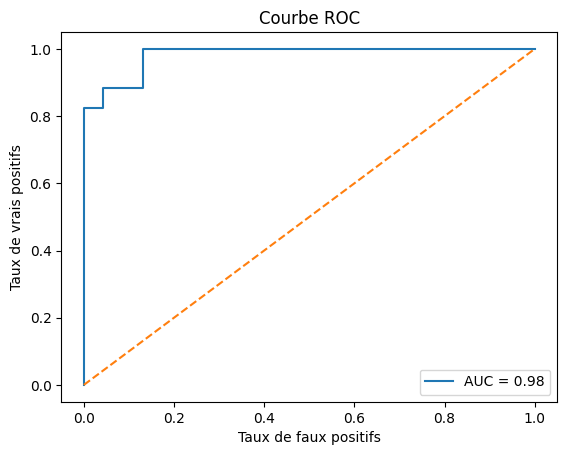

In [5]:
# 🚀 Entraînement du modèle
target_col = 'label'  # ⚠️ à modifier selon le dataset
(X_train, X_test, y_train, y_test), task = preprocess(df, target_col)

if task == 'regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"MSE: {mean_squared_error(y_test, preds):.2f}")
    plt.scatter(y_test, preds)
    plt.xlabel("Réel")
    plt.ylabel("Prédictions")
    plt.title("Régression : Réel vs Prédictions")
    plt.show()
else:
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    plot_confusion(y_test, preds)
    plot_feature_importance(model, X_train)
    if len(np.unique(y_test)) == 2:
        scores = model.predict_proba(X_test)[:, 1]
        plot_roc(y_test, scores)